# Hierarchical Clustering
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
df = pd.read_csv('../../dataset/student_lifestyle_100k.csv')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols].fillna(df[numeric_cols].mean()).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

print(f'Data shape: {X_scaled.shape}')

Data shape: (100000, 8)


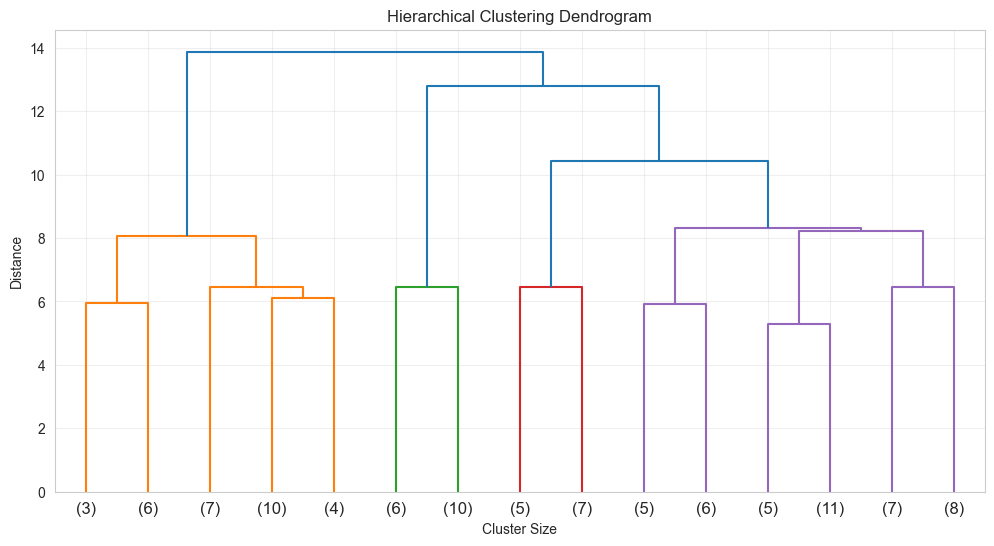

In [3]:
sample_size = min(100, len(X_scaled))
sample_idx = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_idx]

linkage_matrix = linkage(X_sample, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=15)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.grid(alpha=0.3)
plt.show()

In [5]:
optimal_k = 5
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
labels_sample = hc.fit_predict(X_sample)

labels = np.zeros(len(X_scaled), dtype=int)
labels[sample_idx] = labels_sample

print(f'Silhouette Score: {silhouette_score(X_sample, labels_sample):.4f}')

Silhouette Score: 0.1006


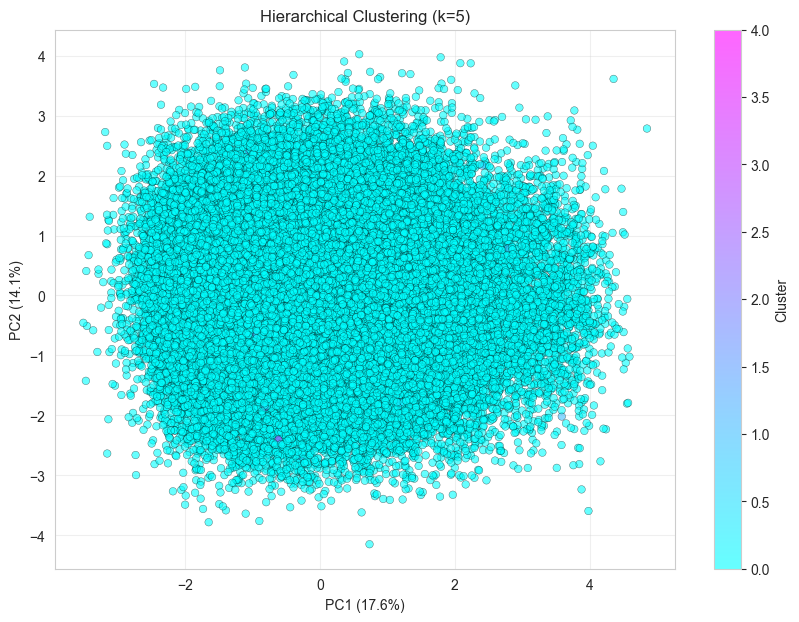

In [6]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='cool', 
                       s=30, alpha=0.6, edgecolors='black', linewidth=0.3)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title(f'Hierarchical Clustering (k={optimal_k})')
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)
plt.show()